# Análisis inferencial de trafico en servidores web
## Mitsiu Alejandro Carreño Sarabia E23S-18014


In [ ]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np

In [89]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_parquet("./full2.parquet")
df.shape

(1017176, 22)

## Exploración de datos

In [91]:
df.head(10)

,remote_addr,remote_usr,date_time,date,time,request,req_method,req_uri,http_ver,status,body_bytes_sent,http_referer,user_agent,dec_req_uri,clean_path,clean_query_list,domain,fdate,dateunixtimest,ftime,fabstime,fdatetime
0,185.213.174.190,-,[27/Jun/2023:07:12:12 -0600],27/Jun/2023,07:12:12,"""GET / HTTP/1.1""",GET,/,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/,/,[],,2023-06-27,1.687824e+09,07:12:12,7.2,2023-06-27 07:12:12
1,185.213.174.190,-,[27/Jun/2023:07:12:12 -0600],27/Jun/2023,07:12:12,"""GET /index.php?s=/index/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/index/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/index/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');,/index.php,"[[s, /index/think\app/invokeMethod], [method[0], think\view\driver\Php], [method[1], display], [vars[0], <?php echo md5('1f3870be274f6c49b3e31a0c6728957f');]]",,2023-06-27,1.687824e+09,07:12:12,7.2,2023-06-27 07:12:12
2,185.213.174.190,-,[27/Jun/2023:07:12:13 -0600],27/Jun/2023,07:12:13,"""GET /index.php?s=/admin/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/admin/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/admin/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');,/index.php,"[[s, /admin/think\app/invokeMethod], [method[0], think\view\driver\Php], [method[1], display], [vars[0], <?php echo md5('1f3870be274f6c49b3e31a0c6728957f');]]",,2023-06-27,1.687824e+09,07:12:13,7.2,2023-06-27 07:12:13
3,185.213.174.190,-,[27/Jun/2023:07:12:14 -0600],27/Jun/2023,07:12:14,"""GET /index.php?s=/api/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/api/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/api/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');,/index.php,"[[s, /api/think\app/invokeMethod], [method[0], think\view\driver\Php], [method[1], display], [vars[0], <?php echo md5('1f3870be274f6c49b3e31a0c6728957f');]]",,2023-06-27,1.687824e+09,07:12:14,7.2,2023-06-27 07:12:14
4,185.213.174.190,-,[27/Jun/2023:07:12:14 -0600],27/Jun/2023,07:12:14,"""GET /index.php?s=/home/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/home/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/home/think\app/invokeMethod&method[0]=th

In [5]:
cols_interest = ["remote_usr", "http_ver"]
# Imprimimos los distintos valores que tiene cada columna
print(pd.Series({col: df[col].unique() for col in cols_interest }))

remote_usr    [-, Jose, admin, Brenda, Cecilia, Maria, Yves,...
http_ver                                   [HTTP/1.1, HTTP/1.0]
dtype: object


In [6]:
df["http_referer"].head(3000).unique()

array(['-', 'http://nextcloud-sader.designa.mx/wp-login.php',
       'https://www.latinaer.org/about',
       'https://www.latinaer.org/static/css/main.5f06e3a5.chunk.css',
       'https://moodle.ucags.edu.mx/theme/styles.php/moove/1672684159_1610089734/all',
       'https://moodle.ucags.edu.mx/mod/assign/view.php?id=111342&forceview=1',
       'https://moodle.ucags.edu.mx/login/index.php',
       'https://accounts.google.com/',
       'https://moodle.ucags.edu.mx/course/view.php?id=2027',
       'https://moodle.ucags.edu.mx/course/view.php?id=2027&notifyeditingon=1',
       'https://moodle.ucags.edu.mx/course/editsection.php?id=22323&sr',
       'https://moodle.ucags.edu.mx/course/modedit.php?update=108201&return=0&sr=0',
       'https://moodle.ucags.edu.mx/mod/forum/view.php?id=108201&forceview=1',
       'https://moodle.ucags.edu.mx/course/modedit.php?add=assign&type=&course=2027&section=6&return=0&sr=0',
       'https://www.google.com/', 'http://localhost/',
       'https://servici

In [7]:
df["date"].unique()

array(['27/Jun/2023', '20/Jun/2023', '21/Jun/2023', '13/Jun/2023',
       '14/Jun/2023', '18/Jun/2023', '19/Jun/2023', '15/Jun/2023',
       '16/Jun/2023', '25/Jun/2023', '17/Jun/2023', '24/Jun/2023',
       '26/Jun/2023', '22/Jun/2023', '23/Jun/2023', '24/Mar/2023'],
      dtype=object)

In [8]:
df["time"].max()

'23:59:59'

In [9]:
df["time"].min()

'00:00:00'

In [10]:
df.dtypes

remote_addr                 object
remote_usr                  object
date_time                   object
date                        object
time                        object
request                     object
req_method                  object
req_uri                     object
http_ver                    object
status                     float64
body_bytes_sent            float64
http_referer                object
user_agent                  object
dec_req_uri                 object
clean_path                  object
clean_query_list            object
domain                      object
fdate               datetime64[ns]
dateunixtimest             float64
ftime                       object
fabstime                   float64
fdatetime           datetime64[ns]
dtype: object

In [11]:
import matplotlib.pyplot as plt

In [12]:
df = df.query("fdate > '2023-06-01'").copy()

## Distribución de valores

Text(0, 0.5, 'Hora (normalizada)')

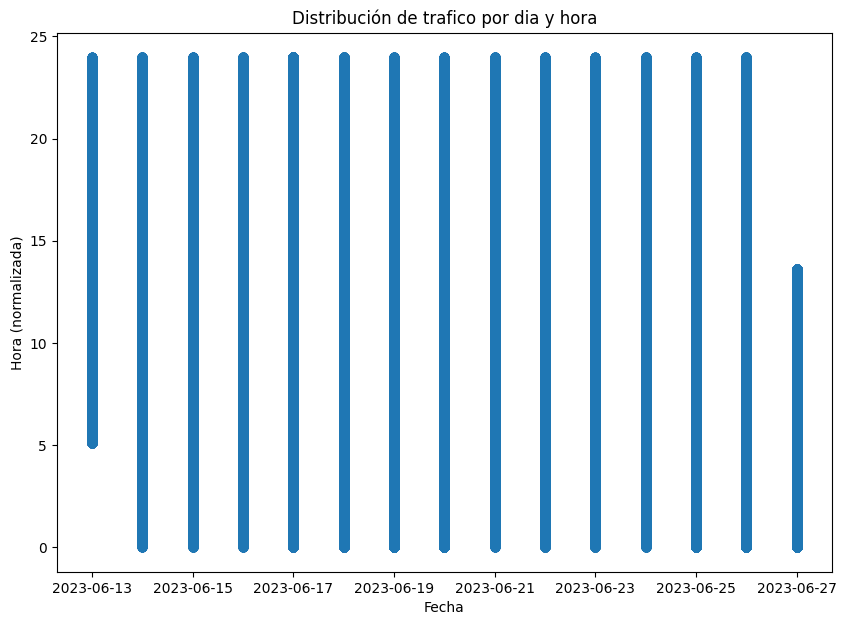

In [13]:
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [10, 7]
plt.locator_params(axis='y', nbins=10)
plt.scatter(df["fdate"], df["fabstime"])
plt.title('Distribución de trafico por dia y hora')
plt.xlabel('Fecha')
plt.ylabel('Hora (normalizada)')

Visualización de distribución de horas de tráfico, se nota una clara tendencia en horarios de trabajo y fines de semana.

In [ ]:
df['fdate'].value_counts().plot(title="Distribución de trafico total por dia", xlabel="Fecha", ylabel="Total de peticiones")

# Bootstrap e intervalo de confianza

Text(0, 0.5, 'Hora (normalizada)')

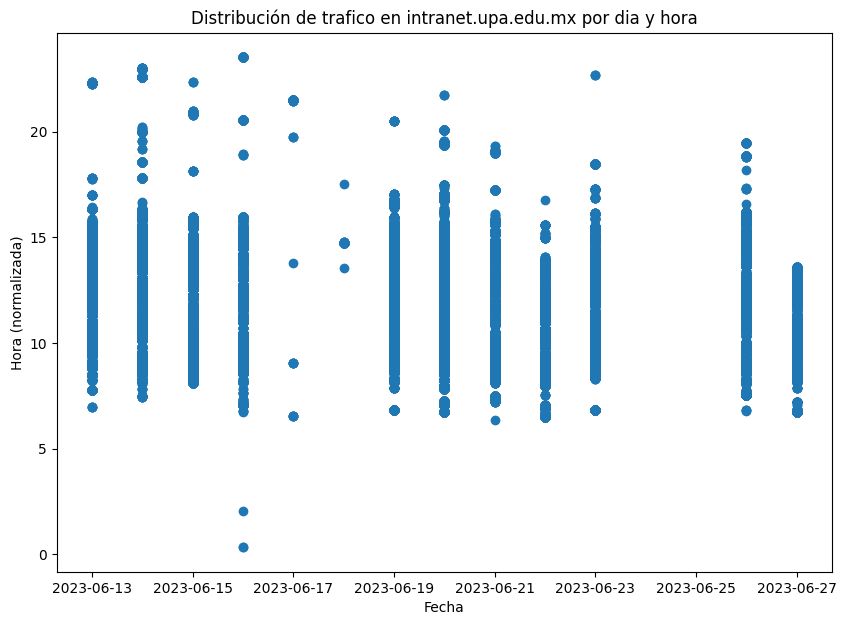

In [15]:
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [10, 7]
plt.locator_params(axis='y', nbins=10)
plt.scatter(df.query("domain == 'intranet.upa.edu.mx'")["fdate"], df.query("domain == 'intranet.upa.edu.mx'")["fabstime"])
plt.title('Distribución de trafico en intranet.upa.edu.mx por dia y hora')
plt.xlabel('Fecha')
plt.ylabel('Hora (normalizada)')

<Axes: title={'center': 'Distribución de trafico total en intranet.upa.edu.mx por dia'}, xlabel='Fecha', ylabel='Total de peticiones'>

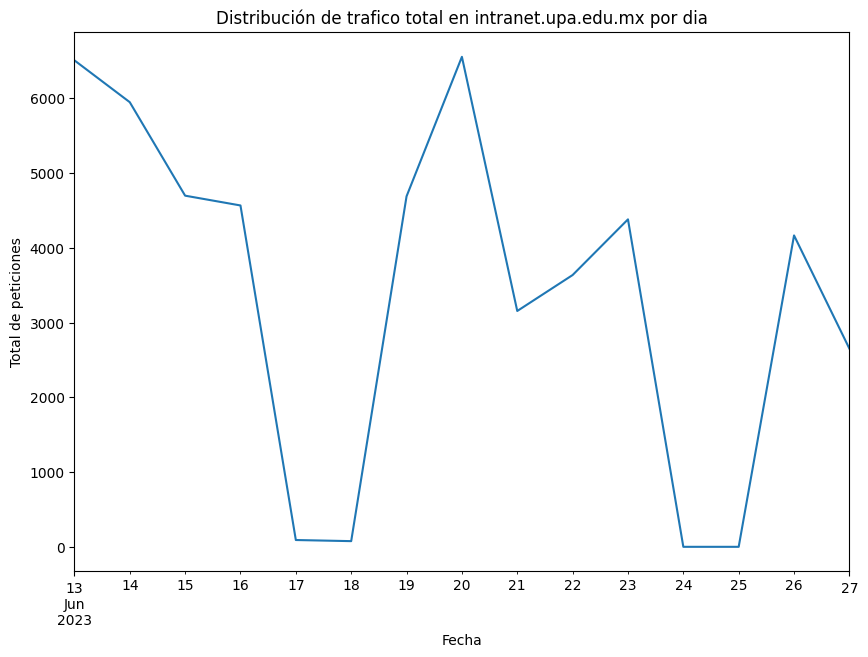

In [16]:
df['domain'] \
    .eq('intranet.upa.edu.mx') \
    .astype(int) \
    .groupby(df['fdate']) \
    .sum() \
    .plot(title="Distribución de trafico total en intranet.upa.edu.mx por dia", xlabel="Fecha", ylabel="Total de peticiones")

In [17]:
freq_upa = df['domain'] \
    .eq('intranet.upa.edu.mx') \
    .astype(int) \
    .groupby(df['fdate']) \
    .sum()

In [18]:
freq_upa

fdate
2023-06-13    6510
2023-06-14    5950
2023-06-15    4699
2023-06-16    4568
2023-06-17      91
2023-06-18      76
2023-06-19    4690
2023-06-20    6557
2023-06-21    3156
2023-06-22    3637
2023-06-23    4382
2023-06-24       0
2023-06-25       0
2023-06-26    4167
2023-06-27    2652
Name: domain, dtype: int64

In [19]:
freq_upa.max()

6557

In [20]:
print("Min")
print(freq_upa.min())
print("Max")
print(freq_upa.max())
print("Promedio")
print(freq_upa.mean())
print("Varianza")
print(freq_upa.var())
print("Desv Est")
print(freq_upa.std())


Min
0
Max
6557
Promedio
3409.0
Varianza
5585859.857142857
Desv Est
2363.442374407055


In [21]:
# Nuestra muestra son los datos de la frecuencia de peticiones de la upa
upa_sample_data = freq_upa.to_numpy()

# Cantidad de submuestras a generar
num_samples = 1000  

# Lista para guardar los promedios generados (u otro estimador)
freq_upa_bootstrap_means = []

# Realizar remuestreo
for _ in range(num_samples):
    # Generamos submuestra con reemplazo
    bootstrap_sample = np.random.choice(
        upa_sample_data, 
        size=len(upa_sample_data), 
        replace=True)
    # Calculamos el estimador puntual de interés y lo guardamos
    freq_upa_bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the confidence interval (using percentiles)
upa_freq_confidence_interval = np.percentile(freq_upa_bootstrap_means, [2.5, 97.5])

In [22]:
upa_freq_confidence_interval

array([2268.47166667, 4533.23166667])

(0.0, 110.0)

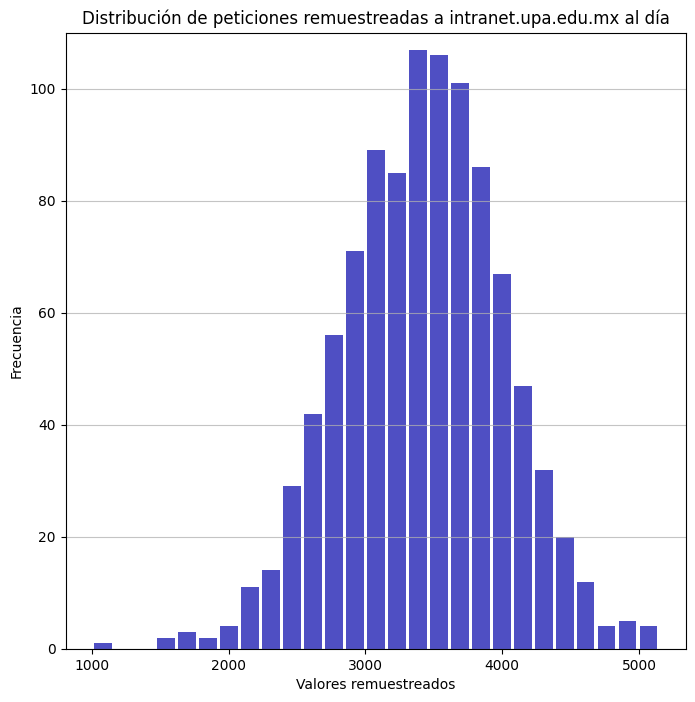

In [71]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=freq_upa_bootstrap_means, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.rcParams['figure.figsize'] = [10,8]
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Valores remuestreados')
plt.ylabel('Frecuencia')
plt.title('Distribución de peticiones remuestreadas a intranet.upa.edu.mx al día')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [24]:
#df["fdate"], df["fabstime"])
df.query("fdate == '2023-06-25' and fabstime > 23")["domain"].unique()

/tmp/ipykernel_5478/2252537124.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.query("fdate == '2023-06-25' and fabstime > 23")["domain"].unique()


array(['moodle.ucags.edu.mx', 'mail.google.com', 'localhost', '',
       'puntoderecarga.mx', 'accounts.google.com',
       'com.google.android.gm', 'www.bing.com', 'servicios.ieec.mx',
       'aprendizajes.ieec.mx', 'sii.upa.edu.mx', 'www.google.com',
       'ieec.mx', 'ojs.latinaer.org', '158.69.255.11:80',
       'ports.designa.mx', 'whatsapp-queue.designa.mx', 'repo.designa.mx',
       'cms.designa.mx', 'com.google.android.googlequicksearchbox'],
      dtype=object)

# Inferencia por verosimilitud

<Axes: title={'center': 'Distribución de trafico total en dbmanager.designa.mx por dia'}, xlabel='Fecha', ylabel='Total de peticiones'>

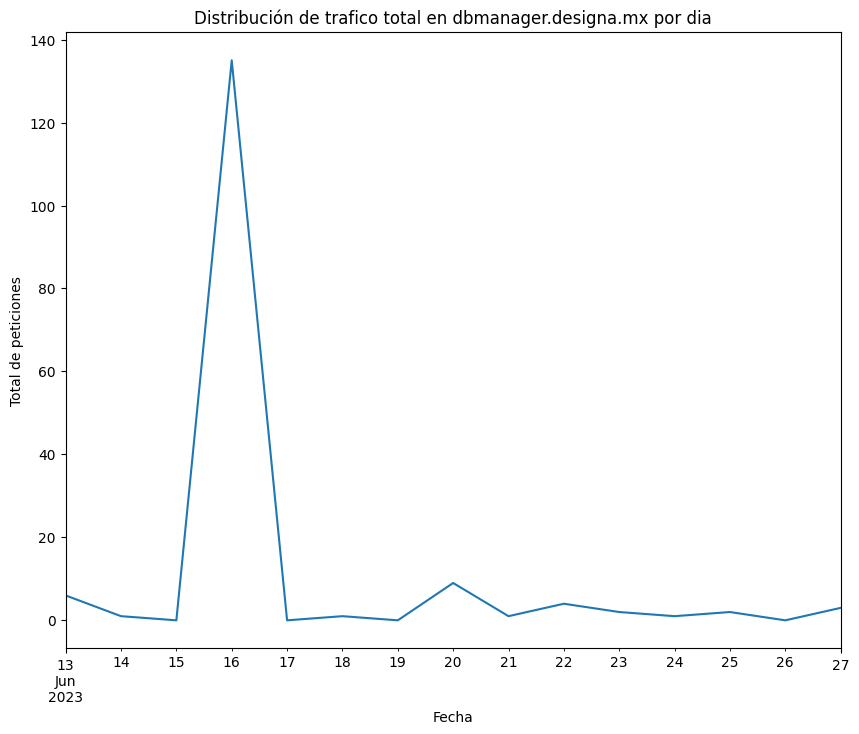

In [72]:
 	
df['domain'] \
    .eq('dbmanager.designa.mx') \
    .astype(int) \
    .groupby(df['fdate']) \
    .sum() \
    .plot(title="Distribución de trafico total en dbmanager.designa.mx por dia", xlabel="Fecha", ylabel="Total de peticiones")

In [26]:
freq_dbm = df['domain'] \
    .eq('dbmanager.designa.mx') \
    .astype(int) \
    .groupby(df['fdate']) \
    .sum() 

In [27]:
#df.query("domain == 'dbmanager.designa.mx' and fdate == '2023-06-16'")
freq_dbm

fdate
2023-06-13      6
2023-06-14      1
2023-06-15      0
2023-06-16    135
2023-06-17      0
2023-06-18      1
2023-06-19      0
2023-06-20      9
2023-06-21      1
2023-06-22      4
2023-06-23      2
2023-06-24      1
2023-06-25      2
2023-06-26      0
2023-06-27      3
Name: domain, dtype: int64

In [28]:
test = pd.DataFrame({"sum":freq_dbm, "mdate": np.arange(1,len(freq_dbm)+1,1)})

In [29]:
test

,sum,mdate
fdate,,
2023-06-13,6,1
2023-06-14,1,2
2023-06-15,0,3
2023-06-16,135,4
2023-06-17,0,5
2023-06-18,1,6
2023-06-19,0,7
2023-06-20,9,8
2023-06-21,1,9


In [30]:
!pip install statsmodels

In [31]:
# import the necessary libraries
#import numpy as np
#import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
#from scipy import stats
#from scipy.optimize import minimize

In [32]:
features = api.add_constant(test["mdate"])
model = api.OLS(test["sum"], features).fit()
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sum   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.8722
Date:                Sat, 15 Jun 2024   Prob (F-statistic):              0.367
Time:                        08:27:53   Log-Likelihood:                -73.349
No. Observations:                  15   AIC:                             150.7
Df Residuals:                      13   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.4286     18.776      1.408      0.183     -14.134      66.991
mdate         -1.9286      2.065     -0.934      0.367      -6.390       2.533
==============================================================================
Omnibus:                       35.696   Durbin-Watson:                   2.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.055
Skew:                           3.079   Prob(JB):                     1.67e-15
Kurtosis:                      11.425   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
res = model.resid
standard_dev = np.std(res)
standard_dev

32.16889950306189

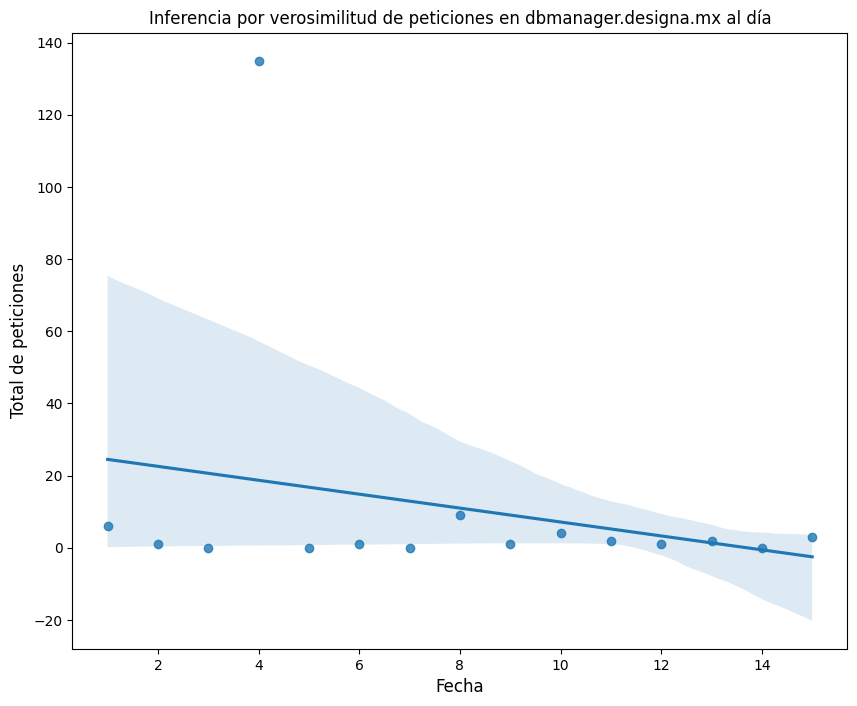

In [87]:
plt.subplots() 
sns.regplot(x='mdate', y='sum', data = test)
# Set label for x-axis 
plt.xlabel( "Fecha" , size = 12 ) 
  
# Set label for y-axis 
plt.ylabel( "Total de peticiones" , size = 12 ) 
  
# Set title for plot 
plt.title( "Inferencia por verosimilitud de peticiones en dbmanager.designa.mx al día" , size = 12) 
plt.show()

# ROC

In [35]:
df["domain"].unique()

array(['', 'nextcloud-sader.designa.mx', 'www.latinaer.org',
       'moodle.ucags.edu.mx', 'accounts.google.com', 'www.google.com',
       'localhost', 'servicios.ieec.mx', 'www.ieec.mx',
       '158.69.255.11:80', 'ojs.latinaer.org', 'com.google.android.gm',
       'aprendizajes.ieec.mx', 'latinaer.org', 'sii.upa.edu.mx',
       'cdn.designa.mx', 'sites.google.com', 'reportesusmef.net',
       'cms.designa.mx', 'accounts.google.com.mx', 'intranet.upa.edu.mx',
       'pbr.upa.edu.mx', 'www.mindmeister.com', 'sis.cij.gob.mx',
       'ieec.mx', 'www.cide-edna.org', 'mx.search.yahoo.com',
       'comunidadaprende.edu.mx', 'web.whatsapp.com',
       'www.comunidadaprende.edu.mx', 'www.aguasvoyalcentro.com',
       'puntoderecarga.mx', 'dbmanager.designa.mx', 'www.google.com.mx',
       'baidu.com', 'scholar.google.com.pe', 'upa.edu.mx',
       'outlook.office.com', 'sader.designa.mx',
       'stage.puntoderecarga.mx', 'experiencia21.tec.mx',
       'www.petalsearch.com', 'search-dra.dt.dba

In [36]:
df.shape

(1016676, 22)

### Red neuronal (clasificador)

In [37]:
df_2 = df.query("domain =='moodle.ucags.edu.mx' or domain == 'dbmanager.designa.mx' or domain == 'intranet.upa.edu.mx'").copy()

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
categorical_cols = ["req_method"]
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_2[categorical_cols])

In [40]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_cols))

In [41]:
df_encoded = pd.concat([df_2["status body_bytes_sent fabstime".split()].reset_index(), one_hot_df.reset_index()], axis=1)

In [42]:
X = df_encoded
y = df_2["domain"].astype("category").cat.codes

In [43]:
print(X.shape[1])
print(y.shape)

8
(392667,)


In [44]:
len(y.unique())

3

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from tensorflow import keras

2024-06-15 08:28:27.199221: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-15 08:28:27.247923: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
model = keras.Sequential([
    keras.layers.Input(shape=(X.shape[1],)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(210, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(len(y.unique()), activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])



2024-06-15 08:28:29.063328: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: UNKNOWN ERROR (34)


In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=117)


In [50]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
7854/7854 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8844 - loss: 0.2622 - val_accuracy: 0.9061 - val_loss: 0.2072
Epoch 2/5
7854/7854 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9042 - loss: 0.2101 - val_accuracy: 0.9102 - val_loss: 0.1981
Epoch 3/5
7854/7854 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9119 - loss: 0.1970 - val_accuracy: 0.9139 - val_loss: 0.1921
Epoch 4/5
7854/7854 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.9138 - loss: 0.1919 - val_accuracy: 0.9190 - val_loss: 0.1830
Epoch 5/5
7854/7854 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.9168 - loss: 0.1902 - val_accuracy: 0.9140 - val_loss: 0.1858


In [51]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Perdida test: {test_loss:.4f}")
print(f"Precision test: {test_accuracy * 100 :.2f}%")

2455/2455 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9136 - loss: 0.1880
Perdida test: 0.1854
Precision test: 91.53%


In [52]:
y_pred = model.predict(X_test)

2455/2455 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [53]:
y


81         2
82         2
83         2
86         2
87         2
          ..
1016133    2
1016134    2
1016135    2
1016136    2
1016262    2
Length: 392667, dtype: int8

In [54]:
y.groupby(y).sum()

0         0
1     51135
2    682734
dtype: int64

In [55]:
from sklearn.preprocessing import LabelBinarizer

In [56]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

In [57]:
print(y_onehot_test.shape)
print(y_onehot_test[:10])

(78534, 3)
[[0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]]


In [58]:
for i in range(3):
    print(f"{i} == {label_binarizer.transform([i])}")

0 == [[1 0 0]]
1 == [[0 1 0]]
2 == [[0 0 1]]


In [59]:
for i in range(3):
    class_id = np.flatnonzero(label_binarizer.classes_ == i)[0]
    print(f"{i} == {class_id}")

0 == 0
1 == 1
2 == 2


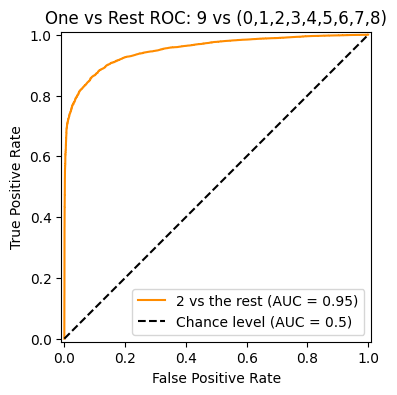

In [60]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred[:, i],
    name=f"{i} vs the rest",
    color="darkorange",
    plot_chance_level=True
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One vs Rest ROC: 9 vs (0,1,2,3,4,5,6,7,8)"
)

In [61]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, roc_auc = dict(), dict(), dict()

# Micro-promedio
fpr["micro"], tpr["micro"], micro_thresholds = roc_curve(y_onehot_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-promedio One vs Rest ROC AUC: {roc_auc['micro']}")

#===================
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_pred,
    multi_class="ovr",
    average="micro"
)
print(f"Micro-promedio función: {micro_roc_auc_ovr}")

Micro-promedio One vs Rest ROC AUC: 0.9894504068600772
Micro-promedio función: 0.9894504068600772


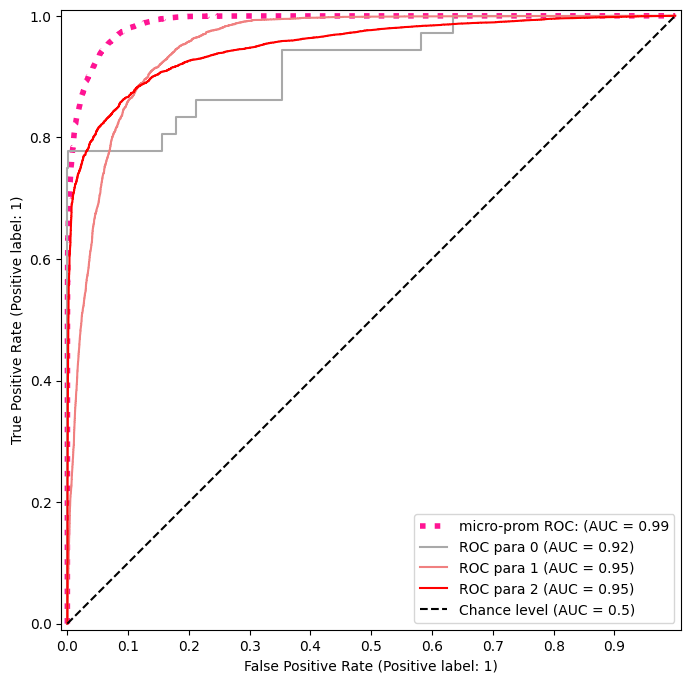

In [88]:
fig, ax = plt.subplots(figsize=(8,10))

plt.xticks(np.arange(0, 1, 0.1))
# Dibujar el roc micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-prom ROC: (AUC = {roc_auc['micro']:.2f}",
    color="deeppink",
    linestyle=":",
    linewidth=4
)

colors = ["darkgray", 
          "lightcoral", 
          "red",
          "darkorange",
          "gold",
          "chartreuse",
          "forestgreen",
          "aqua", 
          "orchid",
          "cornflowerblue"]

# Dibujar cada una de las categorías
for i in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],
        y_pred[:, i],
        name=f"ROC para {i}",
        color=colors[i],
        ax = ax,
        plot_chance_level=(i == 2)
    )


In [63]:
# Basado en indice de Youden
# tomando los true positive rate y false positive rate
youden = tpr["micro"] - fpr["micro"]
# Al ser un problema de optimización en la que queremos máximizar el true positive rate y minimizar el false positive rate
youden_argmax = np.argmax(youden)
# Buscamos en los thresholds que nos regresa ROC 
cut_off = micro_thresholds[youden_argmax]

print(f"Punto de corte óptimo : {cut_off:.3f}")

Punto de corte óptimo : 0.364


In [64]:
print(micro_thresholds[np.argmax(tpr["micro"] - fpr["micro"])])

0.36424586


## Regresión lineal

In [ ]:
data = df[["fabstime", "body_bytes_sent"]].to_numpy()

In [ ]:
plt.rcParams['figure.figsize'] = [18, 7]
plot = plt.scatter( data[:,0],data[:,1] )
plt.title('Distribución de trafico por hora')
plt.xlabel('Hora (0-24)')
plt.ylabel('Bytes enviados')

In [ ]:
print(f"Mínimo {min(data[:,1])}")

In [ ]:
print(f"Máximo {max(data[:,1])}")

In [ ]:
df.query("body_bytes_sent == 41148667")

Únicamente basado en este análisis, hace sentido que el máximo sea de 41 Mb ya que se trata de un endpoint de respaldos de bases de datos. 

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

x=np.array(df["fabstime"]).reshape(-1,1)
y=df["body_bytes_sent"]

reg = LinearRegression().fit(x,y)

print(f"Coeficiente (Tetha 1){reg.coef_}")

print(f"Intercepto (Tetha 0) {reg.intercept_}")

In [ ]:
print(f"Ecuación: y={reg.intercept_} + {reg.coef_[0]}x")

In [ ]:
y_pred = reg.predict(np.array(df["fabstime"]).reshape(-1,1))


#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 7]
plt.locator_params(axis='y')
plt.scatter(df["fabstime"], df["body_bytes_sent"])

plt.plot(x, y_pred, c='red', label = 'Predic')

plt.title('Distribución de trafico por hora')
plt.xlabel('Hora (0-24)')
plt.ylabel('Bytes enviados')
plt.legend()
plt.show()

## Clusterización

In [ ]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 7]
#plt.pyplot.figure(figsize=(8, 6), dpi=80)
plt.scatter(df["body_bytes_sent"], df["status"])
plt.title('Cantidad de bytes enviados por estatus HTTP de respuesta')
plt.xlabel('Cantidad de bytes')
plt.ylabel('Código HTTP de respuesta')

In [ ]:
from sklearn.cluster import KMeans


body_status = df.loc[:,["body_bytes_sent", "status"]].values

wcss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i,
  init = 'k-means++', max_iter = 300, n_init = 3)
  kmeans.fit(body_status)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title("Método de codo")
plt.xlabel("Número de grupos")
plt.ylabel("Suma de cuadrados en grupo")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters= 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(body_status)

plt.scatter(body_status[y_kmeans == 0, 0], body_status[y_kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')
plt.scatter(body_status[y_kmeans == 1, 0], body_status[y_kmeans == 1,1],s = 100, c='cyan', label = 'Cluster 2')
plt.scatter(body_status[y_kmeans == 2, 0], body_status[y_kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')
plt.scatter(body_status[y_kmeans == 3, 0], body_status[y_kmeans == 3,1],s = 100, c='magenta', label = 'Cluster 4')
#plt.scatter(body_status[y_kmeans == 4, 0], body_status[y_kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 25, c = 'black', label = 'Centroids')

plt.title('Clusters of peticiones')
plt.xlabel('Cantidad de bytes')
plt.ylabel('Código HTTP de respuesta')
plt.legend()
plt.show()


In [ ]:
df.query("date_time == '[13/Jun/2023:05:06:49 -0600]'")[["date_time", "fdatetime", "body_bytes_sent"]]

In [ ]:
df_date_bytes = df.groupby(['fdatetime'], as_index=False).sum(["body_bytes_sent"])

In [ ]:
df_date_bytes.head(250)

In [ ]:
df_date_bytes.dtypes

In [ ]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 7]
plt.locator_params(axis='y', nbins=10)
plt.scatter(df_date_bytes.query("fdatetime > '2023-06-01 00:00:00'")["fdatetime"], 
            df_date_bytes.query("fdatetime > '2023-06-01 00:00:00'")["body_bytes_sent"])
plt.title('Distribución de trafico por dia y hora')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de bytes')

In [ ]:

plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 12]
plt.locator_params(axis='y', nbins=10)
plt.scatter(df_date_bytes.query("fdatetime > '2023-06-14 00:00:00' and fdatetime < '2023-06-15 00:00:00'")["fdatetime"], 
            df_date_bytes.query("fdatetime > '2023-06-14 00:00:00' and fdatetime < '2023-06-15 00:00:00'")["body_bytes_sent"])
plt.title('Distribución de trafico por dia y hora')
plt.xlabel('Fecha')
plt.ylabel('Hora (normalizada)')

In [ ]:
max(df_date_bytes["body_bytes_sent"])

In [ ]:
min(df_date_bytes["body_bytes_sent"])

In [ ]:
import numpy as np
np.quantile(df_date_bytes["body_bytes_sent"], [0.25, 0.5, 0.75])

In [ ]:
pd.crosstab(df.query("domain == 'intranet.upa.edu.mx'")["clean_path"], df.query("domain == 'intranet.upa.edu.mx'")["fdate"])

In [ ]:
ax = df.groupby("date")["remote_addr"].count().plot(figsize=(10,5))
ax.set_xlabel("Fecha")
ax.set_ylabel("Num peticiones")

In [ ]:
data = df.query("fdatetime > '2023-06-14 00:00:00' and fdatetime < '2023-06-15 00:00:00'")[["status", "body_bytes_sent"]].to_numpy()

In [ ]:
len(data)

In [ ]:
data

In [ ]:
plot = plt.scatter( data[:,0],data[:,1] )